DESCRIPTIVE ANALYSIS

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wine_review_final_dataset.csv')

In [3]:
df.head(10)

,Country,Description,Price,Province,Title,Variety,Winery,Wine_Category,Final_Weighted_Score
0,Portugal,"This is ripe and fruity, a wine that is smooth...",15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Red,61.25
1,USA,"Tart and snappy, the flavors of lime flesh and...",14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,White,52.53
2,USA,"Pineapple rind, lemon pith and orange blossom ...",13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,White,52.53
3,USA,"Much like the regular bottling from 2012, this...",65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Red,52.53
4,Spain,Blackberry and raspberry aromas show a typical...,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,Red,48.75
5,Italy,"Here's a bright, informal red that opens with ...",16.0,Sicily & Sardinia,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,Other,52.53
6,France,This dry and restrained wine offers spice in p...,24.0,Alsace,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,Other,61.25
7,Germany,Savory dried thyme notes accent sunnier flavor...,12.0,Rheinhessen,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel,Other,52.53
8,France,This has great depth of flavor with its fresh ...,27.0,Alsace,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,White,52.53
9,USA,"Soft, supple plum envelopes an oaky structure ...",19.0,California,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,Red,52.53


In [64]:
# Check how many wines are in each category
categories_stats = df['Wine_Category'].value_counts()
print("--- Top 5 Wine Categories by Frequency ---")
print(categories_stats.head(5))

--- Top 5 Wine Categories by Frequency ---
Wine_Category
Red          54521
Other        29713
White        29316
Rosé          3474
Sparkling     3288
Name: count, dtype: int64


In [123]:
variety_stats = df["Variety"].value_counts()
print("--- Top 5 Wines by Frequency ---")
print(variety_stats.head(5))

--- Top 5 Wines by Frequency ---
Variety
Pinot Noir                  12785
Chardonnay                  11077
Cabernet Sauvignon           9384
Red Blend                    8466
Bordeaux-style Red Blend     5340
Name: count, dtype: int64


In [9]:
#Distribution from the final_weigthed_score after normalization
df["Final_Weighted_Score"].value_counts()

Final_Weighted_Score
52.53     79809
61.25      2138
63.75      2056
58.75      1687
68.75      1679
          ...  
93.75         5
12.50         4
100.00        2
97.50         1
10.00         1
Name: count, Length: 73, dtype: int64

In [ ]:
#Unique values for the top countries and wineries 
country_stats = df['Country'].value_counts()
winery_stats = df['Winery'].value_counts()

print("--- Top 5 Countries by Frequency ---")
print(country_stats.head(5))

print("\n--- Top 5 Wineries by Frequency ---")
print(winery_stats.head(5))

--- Top 5 Countries by Frequency ---
Country
USA         59369
France      17776
Italy       16914
Spain        6573
Portugal     4875
Name: count, dtype: int64

--- Top 5 Wineries by Frequency ---
Winery
Testarossa               217
Williams Selyem          211
Wines & Winemakers       209
DFJ Vinhos               209
Chateau Ste. Michelle    193
Name: count, dtype: int64


In [25]:
# Detailed statistics for numerical columns
desc_stats = df.describe().T
print(desc_stats)

                         count       mean        std   min    25%    50%  \
Price                 120915.0  35.368796  41.031188  4.00  17.00  25.00   
Final_Weighted_Score  120915.0  52.528526  10.404195  6.25  52.53  52.53   

                        75%     max  
Price                 42.00  3300.0  
Final_Weighted_Score  52.53   100.0  


DATA ANALYSIS: AGGREGATION & GROUPING

In [ ]:
#Market Visibility: Top 10 Wineries by Review Frequency
# 1. Count the occurrences of each winery (and include their country)
top_frequency = df.groupby(['Winery', 'Country', 'Province']).size().reset_index(name='Review_Count')

# 2. Sort by count (Descending)
top_frequency = top_frequency.sort_values(by='Review_Count', ascending=False).head(10)

print("Market Leaders: Top 10 Wineries by Review Frequency")
print(top_frequency[['Winery', 'Country', 'Province', 'Review_Count']])

Market Leaders: Top 10 Wineries by Review Frequency
                      Winery   Country    Province  Review_Count
16023             Testarossa       USA  California           217
17646        Williams Selyem       USA  California           211
3151   Chateau Ste. Michelle       USA  Washington           193
10723           Louis Latour    France    Burgundy           172
5583              DFJ Vinhos  Portugal      Lisboa           159
5123          Columbia Crest       USA  Washington           158
9663         Kendall-Jackson       USA  California           130
8059            Gary Farrell       USA  California           125
10846                 Lynmar       USA  California           118
14130         Robert Mondavi       USA  California           112


In [129]:
#Quality Leaders: Top 10 Wineries by Average Score

# 1. Group by Winery/Country and calculate Average Score and Review Count
quality_analysis = df.groupby(['Winery', 'Country']).agg(
    Avg_Score=('Final_Weighted_Score', 'mean'),
    Review_Count=('Winery', 'count')
).reset_index()

# 2. Filter for reliability (at least 5 reviews) and sort by score
top_scores = quality_analysis[quality_analysis['Review_Count'] >= 100].sort_values(by='Avg_Score', ascending=False).head(10).round(1)

print("Quality Leaders: Top 10 Wineries by Average Score (Min. 5 Reviews)")
print(top_scores[['Winery', 'Country', 'Avg_Score']])

Quality Leaders: Top 10 Wineries by Average Score (Min. 5 Reviews)
                      Winery    Country  Avg_Score
9774                  Lynmar        USA       82.0
15726        Williams Selyem        USA       75.6
2785                Chehalem        USA       73.3
12661         Robert Mondavi        USA       71.0
10652                 Montes      Chile       62.8
13043              Santa Ema      Chile       59.0
9663            Louis Latour     France       58.0
14622               Trapiche  Argentina       52.5
7102                   Foxen        USA       52.5
2762   Chateau Ste. Michelle        USA       52.5


HYPOTHESIS 1 - Price vs. Quality (based on scoring)

In [ ]:
# Checking the relationship between Price and Score
correlation = df[['Price', 'Final_Weighted_Score']].corr()
print("Correlation Matrix:")
print(correlation)

# Extract just the single correlation value for your README
corr_value = correlation.loc['Price', 'Final_Weighted_Score']
print(f"\nThe correlation between Price and Rating is: {corr_value:.2f}")

Correlation Matrix:
                         Price  Final_Weighted_Score
Price                 1.000000              0.196093
Final_Weighted_Score  0.196093              1.000000

The correlation between Price and Rating is: 0.20


HYPOTHESIS 2 

2.1 Analysis by Price: most "visible" countries(highest counts of reviews) are the ones with most expensive wines

In [130]:

# 1. Group by Country to get counts and price averages
h2_analysis = df.groupby('Country').agg(
    Review_Count=('Winery', 'count'),
    Avg_Price=('Price', 'mean')
).sort_values('Review_Count', ascending=False)

# 2. Calculate Correlation
price_corr = h2_analysis['Review_Count'].corr(h2_analysis['Avg_Price'])

print(f"Correlation (Volume vs. Price): {price_corr:.2f}")
print("\nTop 10 Countries by Review Volume & Their Avg Price:")
print(h2_analysis.head(10))

Correlation (Volume vs. Price): 0.21

Top 10 Countries by Review Volume & Their Avg Price:
              Review_Count  Avg_Price
Country                              
USA                  59369  36.251865
France               17776  41.139120
Italy                16914  39.663770
Spain                 6573  28.215275
Portugal              4875  26.218256
Chile                 4415  20.787316
Argentina             3756  24.510117
Germany               2120  42.257547
New Zealand           1378  26.931785
South Africa          1293  24.668987


2.2 Analysis by Score ("Visibility vs. Quality"): Countries with the highest score ratings sell the most expensive wines.

In [131]:

# 1. Group by Country to get counts and price averages
h3_analysis = df.groupby('Country').agg(
    Avg_Score = ('Final_Weighted_Score', 'mean'),
    Review_Count=('Winery', 'count'),
    Avg_Price=('Price', 'mean')
).reset_index()

# 2. Calculate Correlation
quality_price_corr = h3_analysis['Avg_Score'].corr(h3_analysis['Avg_Price'])

print(f"Correlation (Volume vs. Quality): {quality_price_corr:.2f}")
print("\nTop 10 Countries by Score Rating & Their Avg Price:")
print(h3_analysis.head(10))

Correlation (Volume vs. Quality): 0.05

Top 10 Countries by Score Rating & Their Avg Price:
                  Country  Avg_Score  Review_Count  Avg_Price
0               Argentina  53.252231          3756  24.510117
1                 Armenia  52.530000             2  14.500000
2  Bosnia And Herzegovina  52.530000             2  12.500000
3                  Brazil  50.128723            47  23.765957
4                Bulgaria  52.530000           141  14.645390
5                  Canada  52.400512           254  35.712598
6                   Chile  53.634034          4415  20.787316
7                   China  52.530000             1  18.000000
8                 Croatia  52.530000            71  25.450704
9          Czech Republic  52.530000            12  24.250000


HYPOTHESIS 3

In [43]:
#Hypothesis No. 3
# 1. Define European (Old World) countries
european_countries = ['France', 'Italy', 'Spain', 'Portugal', 'Germany', 'Austria', 'Greece', 'Hungary']

# 2. Create a 'Region_Type' column
df['Region_Type'] = df['Country'].apply(
    lambda x: 'Europe (Old World)' if x in european_countries else 'Rest of World (New World)'
)

# 3. Compare the averages
h3_comparison = df.groupby('Region_Type')['Final_Weighted_Score'].mean()
print(h3_comparison)

Region_Type
Europe (Old World)           51.105320
Rest of World (New World)    53.493726
Name: Final_Weighted_Score, dtype: float64


In [ ]:
from scipy import stats

# 1. Separate the two groups into their own series
old_world = df[df['Region_Type'] == 'Europe (Old World)']['Final_Weighted_Score']
new_world = df[df['Region_Type'] == 'Rest of World (New World)']['Final_Weighted_Score']

# 2. Perform an Independent T-Test
t_stat, p_value = stats.ttest_ind(old_world, new_world, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# 3. Interpret the result
if p_value < 0.05:
    print("\n✅ Result: Statistically Significant. The 'Region Type' DOES influence the wine score.")
else:
    print("\n❌ Result: Not Significant. Geography alone doesn't explain the score difference.")

T-Statistic: -38.1523
P-Value: 0.0000

✅ Result: Statistically Significant. The 'Region Type' DOES influence the wine score.


DATA VISUALIZATION

In [61]:
#Visuaolization for type of wine (column:wine_category)
import plotly.express as px

# 1. Prepare the data for the chart
category_counts = df['Wine_Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# 2. Create an Interactive Pie Chart
fig = px.pie(
    category_counts, 
    values='Count', 
    names='Category', 
    title='Market Share by Wine Category',
    hole=0.4, # This turns it into a Donut Chart (looks more modern!)
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# 3. Add hover information and styling
fig.update_traces(textinfo='percent+label', pull=[0.1, 0, 0, 0]) # "Pulls" the largest slice out slightly
fig.show()

In [59]:
import plotly.express as px

# 1. Get top 5
top_5 = df["Variety"].value_counts().head(5).reset_index()
top_5.columns = ['Variety', 'Count']

# 2. Create interactive bar chart
fig = px.bar(
    top_5, 
    x='Count', 
    y='Variety', 
    orientation='h', # Horizontal
    text='Count',    # Show numbers on bars
    color='Count',   # Color intensity based on frequency
    color_continuous_scale='Reds',
    title='Interactive: Top 5 Most Frequent Wine Varieties'
)

# 3. Ensure the largest is at the top
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

In [65]:

# 1. Prepare data
top_5_countries = df['Country'].value_counts().head(5).reset_index()
top_5_countries.columns = ['Country', 'Count']

# 2. Add 'Others' category for perspective
total_reviews = df['Country'].count()
others_count = total_reviews - top_5_countries['Count'].sum()
others_df = pd.DataFrame({'Country': ['Others'], 'Count': [others_count]})
plot_df = pd.concat([top_5_countries, others_df])

# 3. Create Interactive Donut Chart
fig = px.pie(
    plot_df, 
    values='Count', 
    names='Country', 
    hole=0.5,
    title='Global Market Share by Review Volume',
    color_discrete_sequence=px.colors.sequential.RdBu
)

fig.update_traces(textinfo='percent+label')
fig.show()

/var/folders/kl/0dt766hd3b37x_5szjj7k7yw0000gn/T/ipykernel_24889/1167535868.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_frequency, x='Review_Count', y='Label', palette='magma')


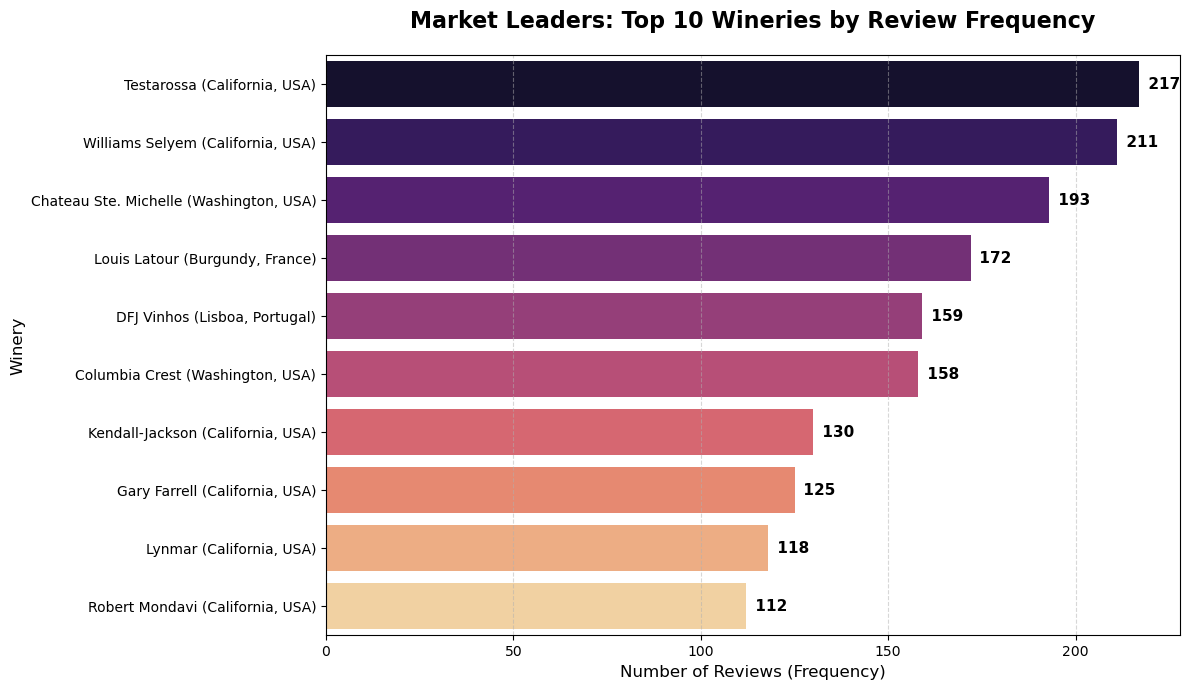

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Group and Sort (Using your logic)
top_frequency = df.groupby(['Winery', 'Country', 'Province']).size().reset_index(name='Review_Count')
top_frequency = top_frequency.sort_values(by='Review_Count', ascending=False).head(10)

# 2. Create a clean label for the Y-axis
top_frequency['Label'] = top_frequency['Winery'] + " (" + top_frequency['Province'] + ", " + top_frequency['Country'] + ")"

# 3. Create the Visualization
plt.figure(figsize=(12, 7))
sns.barplot(data=top_frequency, x='Review_Count', y='Label', palette='magma')

# 4. Customizing for a professional look
plt.title('Market Leaders: Top 10 Wineries by Review Frequency', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Reviews (Frequency)', fontsize=12)
plt.ylabel('Winery', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# 5. Add the actual numbers to the end of each bar
for i, count in enumerate(top_frequency['Review_Count']):
    plt.text(count + 1, i, f" {int(count)}", va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('top_wineries_frequency.png') # This saves the plot for your README
plt.show()

In [56]:
import plotly.express as px

# 1. Prepare the data (Group by Variety and Country)
# We calculate the count and the average score for each type
wine_type_data = df.groupby(['Variety', 'Country']).agg(
    Review_Count=('Winery', 'count'),
    Avg_Score=('Final_Weighted_Score', 'mean')
).reset_index()

# 2. Filter for the top 30 varieties so the chart isn't too crowded
top_varieties = wine_type_data.nlargest(30, 'Review_Count')

# 3. Create the Interactive Treemap
fig = px.treemap(
    top_varieties, 
    path=[px.Constant("All Wine Types"), 'Country', 'Variety'], # Hierarchy
    values='Review_Count',                                     # Size of the box
    color='Avg_Score',                                         # Color of the box
    color_continuous_scale='RdBu_r',                          # Red to Blue scale (reversed)
    title='Interactive Wine Map: Type, Origin, and Quality',
    hover_data=['Avg_Score', 'Review_Count']                  # Info shown on hover
)

# 4. Update layout for a professional look
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

HYPOTHESIS 1 - Price vs. Quality (based on scoring)

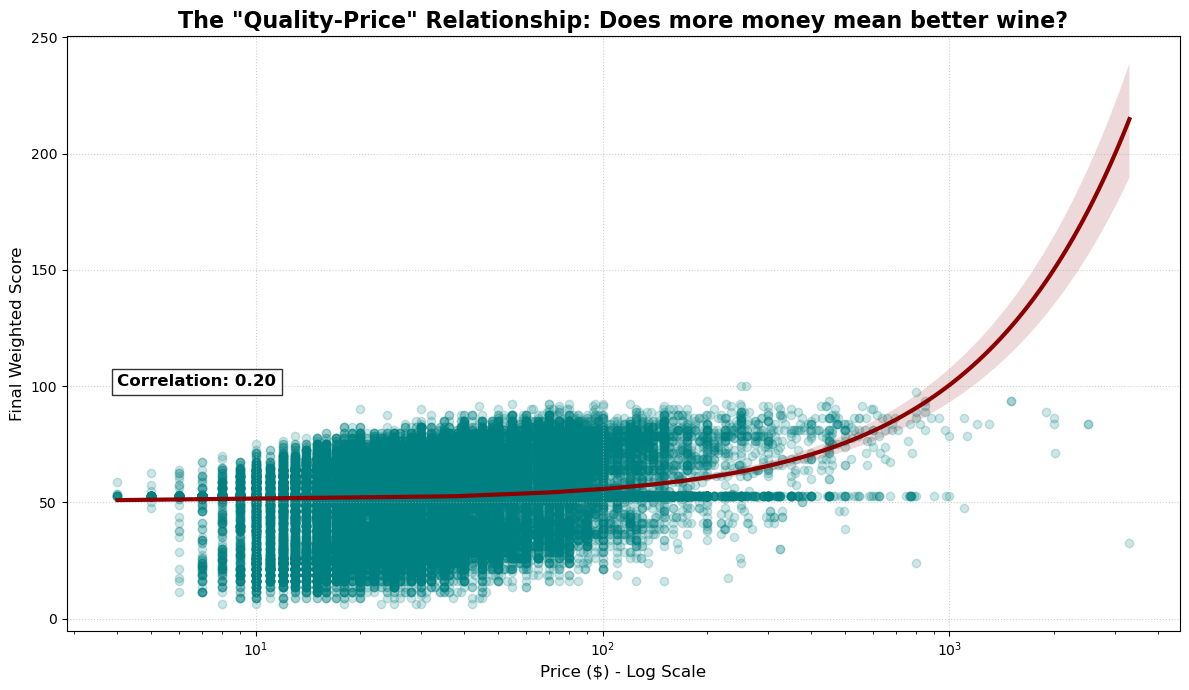

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualization 1: Scatter Plot with Regression Line
plt.figure(figsize=(12, 7))

# We use regplot to show the trend line along with the data points
sns.regplot(data=df, x='Price', y='Final_Weighted_Score', 
            scatter_kws={'alpha':0.2, 'color':'teal'}, 
            line_kws={'color':'darkred', 'lw':3})

# Customization
plt.title('The "Quality-Price" Relationship: Does more money mean better wine?', fontsize=16, fontweight='bold')
plt.xlabel('Price ($) - Log Scale', fontsize=12)
plt.ylabel('Final Weighted Score', fontsize=12)

# Use a log scale for price because wine prices are often heavily skewed 
# (many $20 bottles, very few $2000 bottles)
plt.xscale('log') 

# Add a text box with the correlation value you calculated
plt.text(df['Price'].min(), df['Final_Weighted_Score'].max(), 
         f'Correlation: {corr_value:.2f}', 
         fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.8))

plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.savefig('price_vs_quality_scatter.png')
plt.show()

HYPOTHESIS 2
2.1

/var/folders/kl/0dt766hd3b37x_5szjj7k7yw0000gn/T/ipykernel_24889/467378910.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




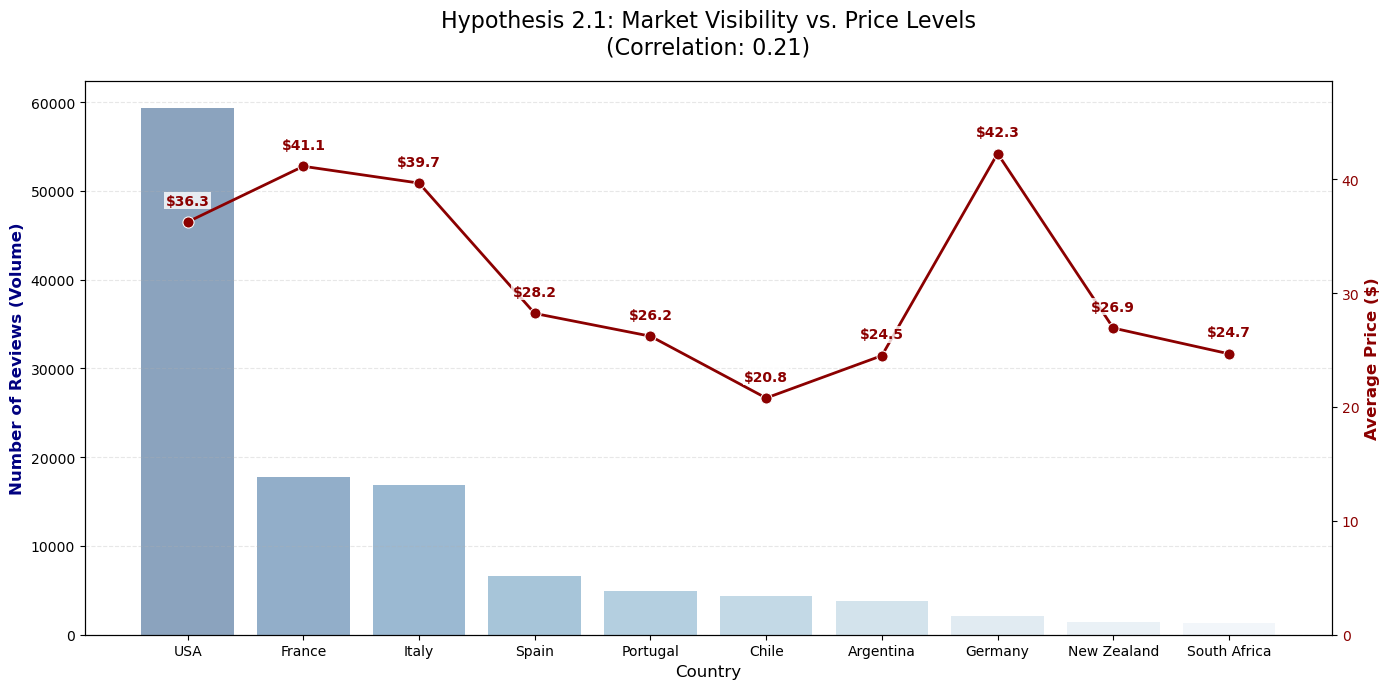

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare data
top_10_countries = h2_analysis.head(10).reset_index()

# 2. Set up figure
fig, ax1 = plt.subplots(figsize=(14, 7))

# 3. Bar Chart (Left Axis)
sns.barplot(data=top_10_countries, x='Country', y='Review_Count', alpha=0.5, ax=ax1, palette='Blues_r')
ax1.set_ylabel('Number of Reviews (Volume)', fontsize=12, fontweight='bold', color='navy')
ax1.set_xlabel('Country', fontsize=12)

# 4. Line Chart (Right Axis)
ax2 = ax1.twinx()
sns.lineplot(data=top_10_countries, x='Country', y='Avg_Price', marker='o', 
             color='darkred', linewidth=2, markersize=8, ax=ax2)
ax2.set_ylabel('Average Price ($)', fontsize=12, fontweight='bold', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

# --- THE FIX: ADDING PADDING AND WHITE BACKGROUNDS ---
# Calculate a dynamic offset (3% of max price)
offset = top_10_countries['Avg_Price'].max() * 0.03

for i, price in enumerate(top_10_countries['Avg_Price']):
    ax2.text(i, price + offset, f'${price:.1f}', 
             color='darkred', ha='center', va='bottom', fontweight='bold',
             # This 'bbox' creates a white halo so the line doesn't cross the text
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.8, pad=1))

# 5. Expand Y-axis to make room for the highest label
ax2.set_ylim(0, top_10_countries['Avg_Price'].max() * 1.15)

plt.title(f'Hypothesis 2.1: Market Visibility vs. Price Levels\n(Correlation: {price_corr:.2f})', fontsize=16, pad=20)
ax1.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

Hypothesis 2.2

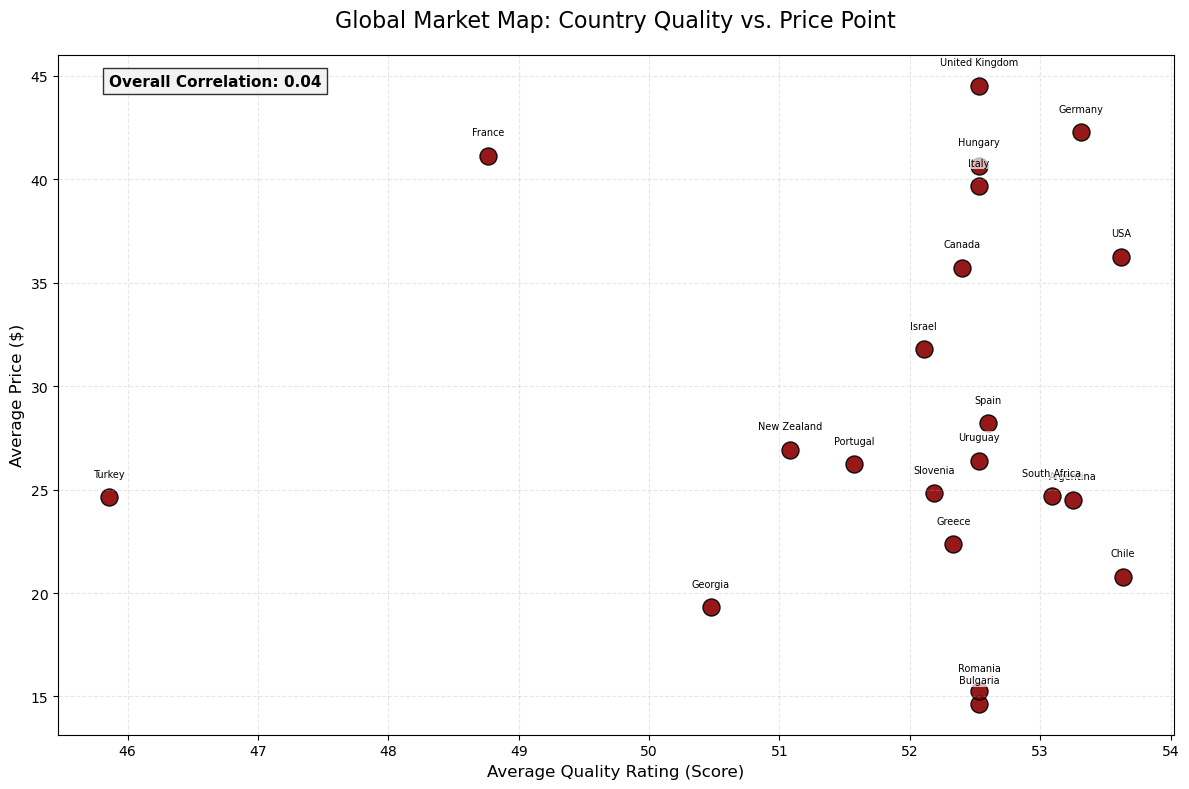

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Clean the logic & filter for major markets (n>=50 reviews)
h3_data = df.groupby('Country').agg(
    Avg_Score=('Final_Weighted_Score', 'mean'),
    Avg_Price=('Price', 'mean'),
    Review_Count=('Winery', 'count')
).reset_index()

# Filtering makes the format cleaner
h3_data = h3_data[h3_data['Review_Count'] >= 80].sort_values('Avg_Score', ascending=False)

# 2. CREATE A TIED, UNCLUTTERED SCATTER PLOT
plt.figure(figsize=(12, 8), facecolor='white')

# We use uniform dots and colors to keep the design sleek
sns.scatterplot(data=h3_data, x='Avg_Score', y='Avg_Price', 
                color='darkred', s=150, alpha=0.9, edgecolor='black', linewidth=1)

# 3. Add highly readable labels using a small offset
for i, row in h3_data.iterrows():
    plt.text(row['Avg_Score'], row['Avg_Price'] + (h3_data['Avg_Price'].max()*0.02), 
             row['Country'], fontsize=7, ha='center', va='bottom',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

# 4. Final Minimalist Styling
plt.title('Global Market Map: Country Quality vs. Price Point', fontsize=16, pad=20)
plt.xlabel('Average Quality Rating (Score)', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Add correlation text in a clean box
quality_price_corr = h3_data['Avg_Score'].corr(h3_data['Avg_Price'])
plt.text(h3_data['Avg_Score'].min(), h3_data['Avg_Price'].max(), 
         f'Overall Correlation: {quality_price_corr:.2f}', 
         fontsize=11, weight='bold', bbox=dict(facecolor='#f0f0f0', alpha=0.8))

plt.tight_layout()
plt.show()

/var/folders/kl/0dt766hd3b37x_5szjj7k7yw0000gn/T/ipykernel_24889/3158369511.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=h3_comparison, x='Region_Type', y='Final_Weighted_Score', palette='viridis')


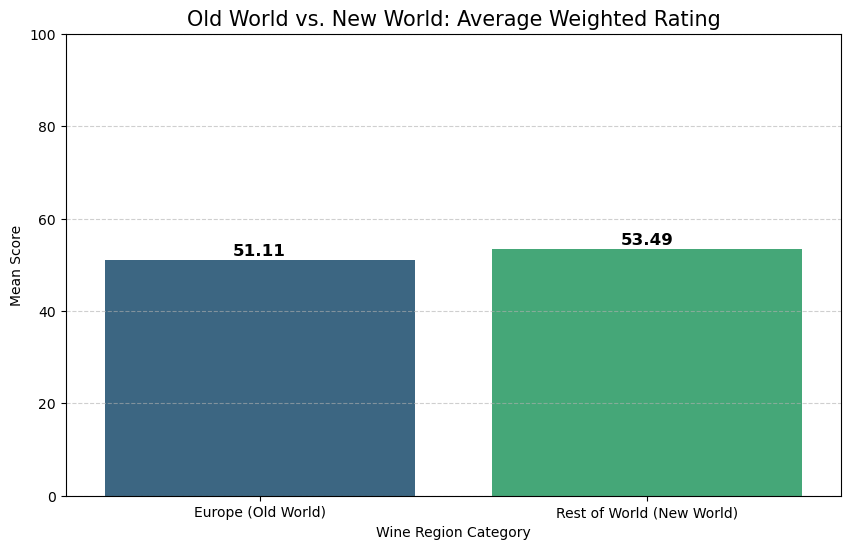

/var/folders/kl/0dt766hd3b37x_5szjj7k7yw0000gn/T/ipykernel_24889/3158369511.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region_Type', y='Final_Weighted_Score', palette='Set2')


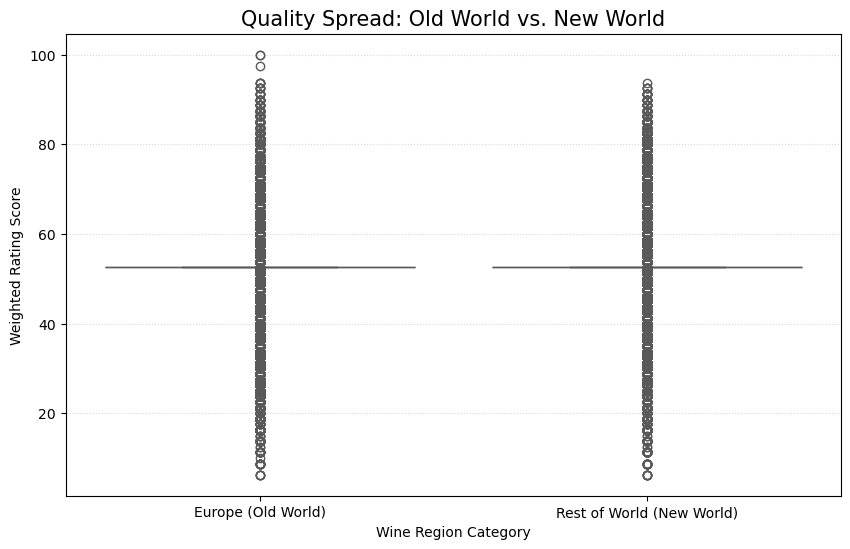

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ensure the grouping is ready
h3_comparison = df.groupby('Region_Type')['Final_Weighted_Score'].mean().reset_index()

# 2. Plot 1: Bar Chart (Average Quality)
plt.figure(figsize=(10, 6))
sns.barplot(data=h3_comparison, x='Region_Type', y='Final_Weighted_Score', palette='viridis')

# Add the actual numbers on top of the bars for clarity
for i, val in enumerate(h3_comparison['Final_Weighted_Score']):
    plt.text(i, val + 1, f'{val:.2f}', ha='center', fontweight='bold', fontsize=12)

plt.title('Old World vs. New World: Average Weighted Rating', fontsize=15)
plt.ylabel('Mean Score')
plt.xlabel('Wine Region Category')
plt.ylim(0, 100) # Assuming the scale is up to 100
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# 3. Plot 2: Box Plot (Distribution/Consistency)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region_Type', y='Final_Weighted_Score', palette='Set2')

plt.title('Quality Spread: Old World vs. New World', fontsize=15)
plt.ylabel('Weighted Rating Score')
plt.xlabel('Wine Region Category')
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.show()